# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/matplotlib/__init__.py:1067: UserWarning: Duplicate key in file "/home/ec2-user/.config/matplotlib/matplotlibrc", line #2
  (fname, cnt))
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/matplotlib/__init__.py:1067: UserWarning: Duplicate key in file "/home/ec2-user/.config/matplotlib/matplotlibrc", line #3
  (fname, cnt))


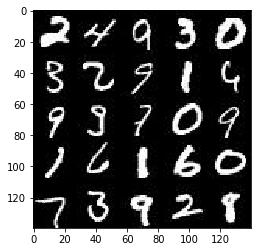

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

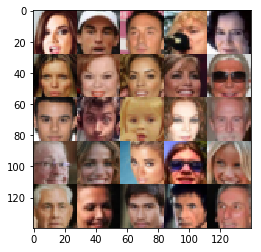

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


TensorFlow Version: 1.7.0
Default GPU Device: /device:GPU:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [5]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    inputs_real = tf.placeholder(tf.float32, (None, image_width, image_height, image_channels), name='input_real')
    inputs_z = tf.placeholder(tf.float32, (None, z_dim), name='input_z')
    learning_rate = tf.placeholder(tf.float32, shape=(), name='lr')

    return inputs_real, inputs_z, learning_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [6]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    alpha = 0.2
    # TODO: Implement Function
    with tf.variable_scope('discriminator', reuse=reuse):
        # Input layer is 28x28x3
        x1 = tf.layers.conv2d(images, 64, 5, strides=2, padding='same')
        relu1 = tf.maximum(alpha * x1, x1)
        # 14x14x64
        
        #print(relu1.get_shape())
        
        x2 = tf.layers.conv2d(relu1, 128, 5, strides=2, padding='same')
        bn2 = tf.layers.batch_normalization(x2, training=True)
        relu2 = tf.maximum(alpha * bn2, bn2)
        # 7x7x128
        #print(relu2.get_shape())
        
        x3 = tf.layers.conv2d(relu2, 256, 5, strides=2, padding='same')
        bn3 = tf.layers.batch_normalization(x3, training=True)
        relu3 = tf.maximum(alpha * bn3, bn3)
        # 4x4x256
        #print(relu3.get_shape())

        # Flatten it
        flat = tf.reshape(relu3, (-1, 4*4*256))
        logits = tf.layers.dense(flat, 1)
        out = tf.sigmoid(logits)
        
        #print(out.get_shape())
        
        return out, logits

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [7]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    alpha = 0.2
    
    # TODO: Implement Function
    with tf.variable_scope('generator', reuse=not is_train):
        # First fully connected layer
        x1 = tf.layers.dense(z, 2*2*512)
        # Reshape it to start the convolutional stack
        x1 = tf.reshape(x1, (-1, 2, 2, 512))
        x1 = tf.layers.batch_normalization(x1, training=is_train)
        x1 = tf.maximum(alpha * x1, x1)
        # 2x2x512 now
        
        #print(x1.get_shape())
        
        x2 = tf.layers.conv2d_transpose(x1, 256, 5, strides=2, padding='valid')
        x2 = tf.layers.batch_normalization(x2, training=is_train)
        x2 = tf.maximum(alpha * x2, x2)
        # 7x7x256 now
        
        #print(x2.get_shape())
        
        x3 = tf.layers.conv2d_transpose(x2, 128, 5, strides=2, padding='same')
        x3 = tf.layers.batch_normalization(x3, training=is_train)
        x3 = tf.maximum(alpha * x3, x3)
        # 14x14x128 now
        
        #print(x3.get_shape())
        
        # Output layer
        logits = tf.layers.conv2d_transpose(x3, out_channel_dim, 5, strides=2, padding='same')
        # 28x28x5 now
        
        #print(logits.get_shape())
        
        out = tf.tanh(logits)
        
        #print(out.get_shape())
        
        return out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [8]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    g_model = generator(input_z, out_channel_dim,is_train=True)
    d_model_real, d_logits_real = discriminator(input_real)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True)

    d_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=tf.ones_like(d_model_real)))
    d_loss_fake = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.zeros_like(d_model_fake)))
    g_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.ones_like(d_model_fake)))

    d_loss = d_loss_real + d_loss_fake

    return d_loss, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [9]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]

    # Optimize
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)

    return d_train_opt, g_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [10]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [11]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    
    print_every=10
    show_every=100
    steps = 0
    num_images = 25
    
    input_real, input_z, lr = model_inputs(data_shape[1], data_shape[2], data_shape[3], z_dim)
        
    d_loss, g_loss = model_loss(input_real, input_z, data_shape[3])
        
    d_opt, g_opt = model_opt(d_loss, g_loss, learning_rate, beta1)

    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                # TODO: Train Model
                steps += 1
                
                batch_images *= 2.0
                
                # Sample random noise for G
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))

                # Run optimizers
                _ = sess.run(d_opt, feed_dict={input_real: batch_images, input_z: batch_z})
                _ = sess.run(g_opt, feed_dict={input_z: batch_z, input_real: batch_images})
                
                if steps % print_every == 0:
                    # At the end of each epoch, get the losses and print them out
                    train_loss_d = d_loss.eval({input_z: batch_z, input_real: batch_images, lr: learning_rate})
                    train_loss_g = g_loss.eval({input_z: batch_z, lr: learning_rate})

                    print("Epoch {}/{}...".format(epoch_i+1, epochs),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))

                if steps % show_every == 0:
                    show_generator_output(sess, num_images, input_z, data_shape[3], data_image_mode)
                

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/2... Discriminator Loss: 3.0111... Generator Loss: 2.5222
Epoch 1/2... Discriminator Loss: 1.9700... Generator Loss: 0.5854
Epoch 1/2... Discriminator Loss: 1.1119... Generator Loss: 0.7649
Epoch 1/2... Discriminator Loss: 0.6468... Generator Loss: 1.2776
Epoch 1/2... Discriminator Loss: 0.2454... Generator Loss: 8.1801
Epoch 1/2... Discriminator Loss: 0.3445... Generator Loss: 5.3864
Epoch 1/2... Discriminator Loss: 1.2877... Generator Loss: 0.6281
Epoch 1/2... Discriminator Loss: 0.4528... Generator Loss: 1.5840
Epoch 1/2... Discriminator Loss: 1.4626... Generator Loss: 1.0846
Epoch 1/2... Discriminator Loss: 0.5481... Generator Loss: 4.3640


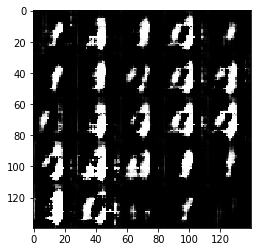

Epoch 1/2... Discriminator Loss: 1.4810... Generator Loss: 0.5247
Epoch 1/2... Discriminator Loss: 0.4631... Generator Loss: 2.8803
Epoch 1/2... Discriminator Loss: 1.0753... Generator Loss: 4.0765
Epoch 1/2... Discriminator Loss: 0.9415... Generator Loss: 1.0484
Epoch 1/2... Discriminator Loss: 1.1753... Generator Loss: 1.2823
Epoch 1/2... Discriminator Loss: 1.0980... Generator Loss: 0.6817
Epoch 1/2... Discriminator Loss: 1.1909... Generator Loss: 2.9287
Epoch 1/2... Discriminator Loss: 0.3225... Generator Loss: 4.0514
Epoch 1/2... Discriminator Loss: 1.7812... Generator Loss: 0.5872
Epoch 1/2... Discriminator Loss: 1.6917... Generator Loss: 0.3928


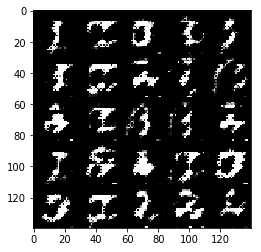

Epoch 1/2... Discriminator Loss: 2.1549... Generator Loss: 0.3825
Epoch 1/2... Discriminator Loss: 1.9397... Generator Loss: 0.5666
Epoch 1/2... Discriminator Loss: 0.4471... Generator Loss: 1.5390
Epoch 1/2... Discriminator Loss: 0.3801... Generator Loss: 2.8364
Epoch 1/2... Discriminator Loss: 0.8540... Generator Loss: 1.6990
Epoch 1/2... Discriminator Loss: 1.6230... Generator Loss: 0.3585
Epoch 1/2... Discriminator Loss: 1.5779... Generator Loss: 0.4425
Epoch 1/2... Discriminator Loss: 0.5447... Generator Loss: 2.1085
Epoch 1/2... Discriminator Loss: 2.9424... Generator Loss: 0.1043
Epoch 1/2... Discriminator Loss: 2.3909... Generator Loss: 0.2517


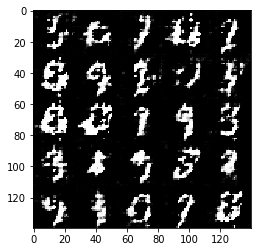

Epoch 1/2... Discriminator Loss: 0.9679... Generator Loss: 1.1544
Epoch 1/2... Discriminator Loss: 1.4093... Generator Loss: 1.8991
Epoch 1/2... Discriminator Loss: 1.2191... Generator Loss: 1.6841
Epoch 1/2... Discriminator Loss: 1.2137... Generator Loss: 2.1186
Epoch 1/2... Discriminator Loss: 0.9566... Generator Loss: 1.6670
Epoch 1/2... Discriminator Loss: 0.9388... Generator Loss: 0.9845
Epoch 1/2... Discriminator Loss: 1.3941... Generator Loss: 0.4823
Epoch 1/2... Discriminator Loss: 1.2749... Generator Loss: 0.8576
Epoch 1/2... Discriminator Loss: 1.0581... Generator Loss: 1.2964
Epoch 1/2... Discriminator Loss: 0.9655... Generator Loss: 1.0966


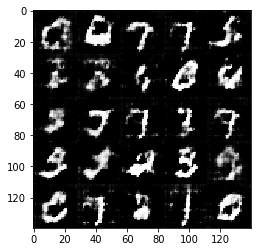

Epoch 1/2... Discriminator Loss: 1.2275... Generator Loss: 0.6153
Epoch 1/2... Discriminator Loss: 1.4761... Generator Loss: 0.4309
Epoch 1/2... Discriminator Loss: 1.0005... Generator Loss: 1.0271
Epoch 1/2... Discriminator Loss: 0.8554... Generator Loss: 1.6935
Epoch 1/2... Discriminator Loss: 0.7483... Generator Loss: 1.5927
Epoch 1/2... Discriminator Loss: 1.0304... Generator Loss: 1.0060
Epoch 1/2... Discriminator Loss: 1.1045... Generator Loss: 0.8267
Epoch 1/2... Discriminator Loss: 0.7570... Generator Loss: 1.6715
Epoch 1/2... Discriminator Loss: 1.2075... Generator Loss: 0.6786
Epoch 1/2... Discriminator Loss: 1.5230... Generator Loss: 2.7851


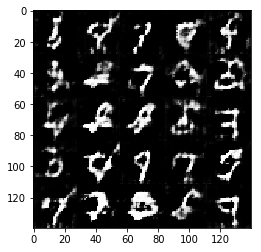

Epoch 1/2... Discriminator Loss: 1.3845... Generator Loss: 2.5490
Epoch 1/2... Discriminator Loss: 1.4423... Generator Loss: 0.4396
Epoch 1/2... Discriminator Loss: 1.1483... Generator Loss: 0.6271
Epoch 1/2... Discriminator Loss: 0.8518... Generator Loss: 1.0388
Epoch 1/2... Discriminator Loss: 0.9554... Generator Loss: 2.9339
Epoch 1/2... Discriminator Loss: 1.1173... Generator Loss: 0.9070
Epoch 1/2... Discriminator Loss: 0.9045... Generator Loss: 1.3482
Epoch 1/2... Discriminator Loss: 1.0394... Generator Loss: 0.8499
Epoch 1/2... Discriminator Loss: 1.0194... Generator Loss: 2.1905
Epoch 1/2... Discriminator Loss: 1.4164... Generator Loss: 2.0422


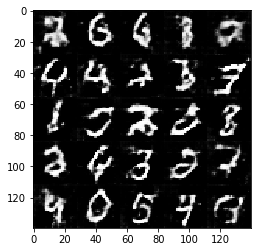

Epoch 1/2... Discriminator Loss: 1.3115... Generator Loss: 0.5370
Epoch 1/2... Discriminator Loss: 0.8434... Generator Loss: 1.3101
Epoch 1/2... Discriminator Loss: 0.9222... Generator Loss: 1.6310
Epoch 1/2... Discriminator Loss: 0.9246... Generator Loss: 1.4205
Epoch 1/2... Discriminator Loss: 0.9605... Generator Loss: 1.4560
Epoch 1/2... Discriminator Loss: 1.6426... Generator Loss: 0.3284
Epoch 1/2... Discriminator Loss: 1.8732... Generator Loss: 0.3085
Epoch 1/2... Discriminator Loss: 1.3586... Generator Loss: 0.7637
Epoch 1/2... Discriminator Loss: 0.9679... Generator Loss: 1.3317
Epoch 1/2... Discriminator Loss: 1.1010... Generator Loss: 0.7960


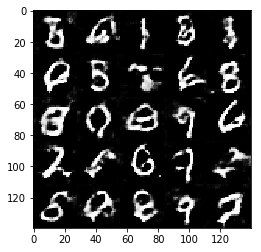

Epoch 1/2... Discriminator Loss: 1.3441... Generator Loss: 0.4162
Epoch 1/2... Discriminator Loss: 1.0277... Generator Loss: 0.7613
Epoch 1/2... Discriminator Loss: 0.9946... Generator Loss: 1.8133
Epoch 1/2... Discriminator Loss: 1.9921... Generator Loss: 0.2042
Epoch 1/2... Discriminator Loss: 1.5031... Generator Loss: 0.4164
Epoch 1/2... Discriminator Loss: 1.1841... Generator Loss: 0.6083
Epoch 1/2... Discriminator Loss: 1.1547... Generator Loss: 0.7756
Epoch 1/2... Discriminator Loss: 1.4131... Generator Loss: 1.3749
Epoch 1/2... Discriminator Loss: 1.3251... Generator Loss: 0.5083
Epoch 1/2... Discriminator Loss: 0.9919... Generator Loss: 0.7737


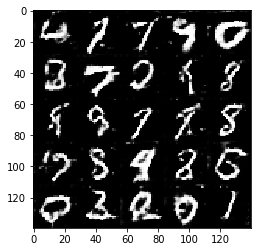

Epoch 1/2... Discriminator Loss: 0.7053... Generator Loss: 1.3276
Epoch 1/2... Discriminator Loss: 1.0225... Generator Loss: 1.4858
Epoch 1/2... Discriminator Loss: 0.6808... Generator Loss: 1.7885
Epoch 1/2... Discriminator Loss: 1.2116... Generator Loss: 0.7505
Epoch 1/2... Discriminator Loss: 1.0807... Generator Loss: 0.8317
Epoch 1/2... Discriminator Loss: 1.7939... Generator Loss: 0.2280
Epoch 1/2... Discriminator Loss: 1.2773... Generator Loss: 0.5089
Epoch 1/2... Discriminator Loss: 1.0878... Generator Loss: 0.6722
Epoch 1/2... Discriminator Loss: 0.8765... Generator Loss: 1.0443
Epoch 1/2... Discriminator Loss: 0.9307... Generator Loss: 0.9111


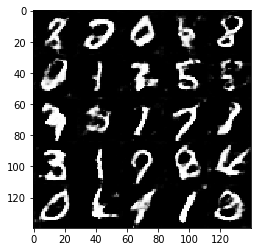

Epoch 1/2... Discriminator Loss: 1.3230... Generator Loss: 0.6319
Epoch 1/2... Discriminator Loss: 1.1811... Generator Loss: 1.0731
Epoch 1/2... Discriminator Loss: 1.4286... Generator Loss: 0.4382
Epoch 2/2... Discriminator Loss: 0.8449... Generator Loss: 0.8827
Epoch 2/2... Discriminator Loss: 0.7226... Generator Loss: 1.3870
Epoch 2/2... Discriminator Loss: 1.9574... Generator Loss: 0.2511
Epoch 2/2... Discriminator Loss: 0.8022... Generator Loss: 1.2707
Epoch 2/2... Discriminator Loss: 1.1384... Generator Loss: 0.6278
Epoch 2/2... Discriminator Loss: 3.8114... Generator Loss: 0.0500
Epoch 2/2... Discriminator Loss: 1.0889... Generator Loss: 1.2219


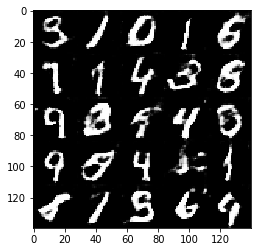

Epoch 2/2... Discriminator Loss: 0.8959... Generator Loss: 1.3525
Epoch 2/2... Discriminator Loss: 0.9938... Generator Loss: 0.9308
Epoch 2/2... Discriminator Loss: 0.9468... Generator Loss: 0.9051
Epoch 2/2... Discriminator Loss: 1.2187... Generator Loss: 0.4836
Epoch 2/2... Discriminator Loss: 1.5187... Generator Loss: 0.4332
Epoch 2/2... Discriminator Loss: 0.8200... Generator Loss: 1.7576
Epoch 2/2... Discriminator Loss: 1.3526... Generator Loss: 2.4312
Epoch 2/2... Discriminator Loss: 1.2667... Generator Loss: 0.4802
Epoch 2/2... Discriminator Loss: 0.7953... Generator Loss: 0.9767
Epoch 2/2... Discriminator Loss: 0.9316... Generator Loss: 0.6917


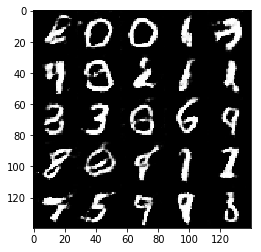

Epoch 2/2... Discriminator Loss: 0.5777... Generator Loss: 1.6295
Epoch 2/2... Discriminator Loss: 2.1567... Generator Loss: 4.8653
Epoch 2/2... Discriminator Loss: 2.1743... Generator Loss: 0.2295
Epoch 2/2... Discriminator Loss: 1.1428... Generator Loss: 0.7667
Epoch 2/2... Discriminator Loss: 0.9477... Generator Loss: 1.1412
Epoch 2/2... Discriminator Loss: 1.3326... Generator Loss: 0.5209
Epoch 2/2... Discriminator Loss: 0.9662... Generator Loss: 1.0692
Epoch 2/2... Discriminator Loss: 0.7940... Generator Loss: 1.8537
Epoch 2/2... Discriminator Loss: 2.3632... Generator Loss: 0.1780
Epoch 2/2... Discriminator Loss: 0.9164... Generator Loss: 1.0460


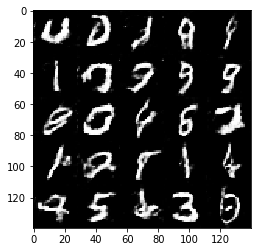

Epoch 2/2... Discriminator Loss: 2.0597... Generator Loss: 0.2334
Epoch 2/2... Discriminator Loss: 0.8369... Generator Loss: 1.2105
Epoch 2/2... Discriminator Loss: 1.9453... Generator Loss: 0.2588
Epoch 2/2... Discriminator Loss: 1.9619... Generator Loss: 0.3533
Epoch 2/2... Discriminator Loss: 1.0043... Generator Loss: 0.8752
Epoch 2/2... Discriminator Loss: 1.6805... Generator Loss: 0.3430
Epoch 2/2... Discriminator Loss: 1.1007... Generator Loss: 0.6771
Epoch 2/2... Discriminator Loss: 1.5503... Generator Loss: 3.0401
Epoch 2/2... Discriminator Loss: 0.8368... Generator Loss: 1.1825
Epoch 2/2... Discriminator Loss: 1.1426... Generator Loss: 0.6605


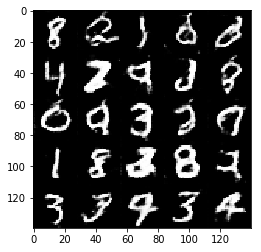

Epoch 2/2... Discriminator Loss: 0.9863... Generator Loss: 2.0577
Epoch 2/2... Discriminator Loss: 0.9524... Generator Loss: 0.8772
Epoch 2/2... Discriminator Loss: 0.8275... Generator Loss: 0.9346
Epoch 2/2... Discriminator Loss: 1.3414... Generator Loss: 0.5313
Epoch 2/2... Discriminator Loss: 1.3267... Generator Loss: 0.5146
Epoch 2/2... Discriminator Loss: 1.0065... Generator Loss: 0.8125
Epoch 2/2... Discriminator Loss: 1.2584... Generator Loss: 0.6221
Epoch 2/2... Discriminator Loss: 0.5419... Generator Loss: 1.5171
Epoch 2/2... Discriminator Loss: 0.3687... Generator Loss: 1.7143
Epoch 2/2... Discriminator Loss: 0.6063... Generator Loss: 1.3642


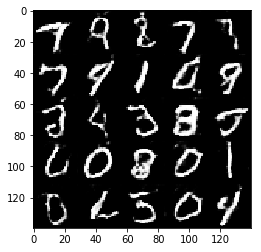

Epoch 2/2... Discriminator Loss: 1.5160... Generator Loss: 0.4055
Epoch 2/2... Discriminator Loss: 2.9943... Generator Loss: 5.9861
Epoch 2/2... Discriminator Loss: 0.8633... Generator Loss: 0.9279
Epoch 2/2... Discriminator Loss: 0.7493... Generator Loss: 1.2338
Epoch 2/2... Discriminator Loss: 1.1249... Generator Loss: 0.6005
Epoch 2/2... Discriminator Loss: 0.9315... Generator Loss: 0.9846
Epoch 2/2... Discriminator Loss: 0.6901... Generator Loss: 1.1906
Epoch 2/2... Discriminator Loss: 0.5621... Generator Loss: 2.4654
Epoch 2/2... Discriminator Loss: 0.2136... Generator Loss: 2.7530
Epoch 2/2... Discriminator Loss: 1.0639... Generator Loss: 0.7714


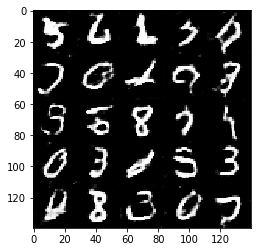

Epoch 2/2... Discriminator Loss: 1.0667... Generator Loss: 1.4435
Epoch 2/2... Discriminator Loss: 1.0425... Generator Loss: 1.1919
Epoch 2/2... Discriminator Loss: 0.9946... Generator Loss: 0.8909
Epoch 2/2... Discriminator Loss: 1.0769... Generator Loss: 0.7201
Epoch 2/2... Discriminator Loss: 0.8895... Generator Loss: 1.0173
Epoch 2/2... Discriminator Loss: 1.1677... Generator Loss: 0.5830
Epoch 2/2... Discriminator Loss: 0.9735... Generator Loss: 2.1169
Epoch 2/2... Discriminator Loss: 1.0486... Generator Loss: 0.6471
Epoch 2/2... Discriminator Loss: 1.5320... Generator Loss: 2.5457
Epoch 2/2... Discriminator Loss: 0.7568... Generator Loss: 1.2419


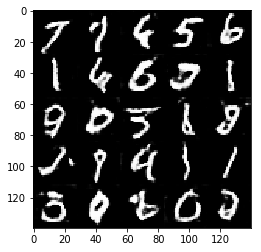

Epoch 2/2... Discriminator Loss: 0.6875... Generator Loss: 1.0597
Epoch 2/2... Discriminator Loss: 0.8883... Generator Loss: 0.8301
Epoch 2/2... Discriminator Loss: 1.1705... Generator Loss: 1.2459
Epoch 2/2... Discriminator Loss: 0.8701... Generator Loss: 1.4724
Epoch 2/2... Discriminator Loss: 1.5904... Generator Loss: 0.3863
Epoch 2/2... Discriminator Loss: 0.8215... Generator Loss: 1.1186
Epoch 2/2... Discriminator Loss: 0.6661... Generator Loss: 1.5052
Epoch 2/2... Discriminator Loss: 0.8355... Generator Loss: 2.2446
Epoch 2/2... Discriminator Loss: 1.4243... Generator Loss: 0.5178
Epoch 2/2... Discriminator Loss: 1.9185... Generator Loss: 0.3169


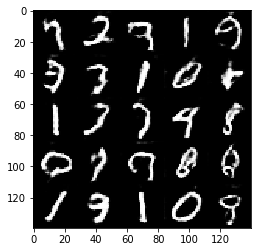

Epoch 2/2... Discriminator Loss: 0.5621... Generator Loss: 1.7198
Epoch 2/2... Discriminator Loss: 1.5256... Generator Loss: 0.5370
Epoch 2/2... Discriminator Loss: 1.2132... Generator Loss: 0.8730
Epoch 2/2... Discriminator Loss: 1.0849... Generator Loss: 1.8774
Epoch 2/2... Discriminator Loss: 0.9215... Generator Loss: 0.8240
Epoch 2/2... Discriminator Loss: 0.7001... Generator Loss: 1.3360
Epoch 2/2... Discriminator Loss: 1.2899... Generator Loss: 0.5703
Epoch 2/2... Discriminator Loss: 0.9274... Generator Loss: 0.8136
Epoch 2/2... Discriminator Loss: 1.1698... Generator Loss: 0.6673
Epoch 2/2... Discriminator Loss: 0.8135... Generator Loss: 1.7568


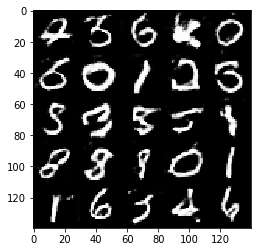

Epoch 2/2... Discriminator Loss: 1.6642... Generator Loss: 0.3485
Epoch 2/2... Discriminator Loss: 1.1966... Generator Loss: 0.5964
Epoch 2/2... Discriminator Loss: 1.3159... Generator Loss: 0.5923
Epoch 2/2... Discriminator Loss: 0.7298... Generator Loss: 2.9234
Epoch 2/2... Discriminator Loss: 0.9388... Generator Loss: 3.1176
Epoch 2/2... Discriminator Loss: 1.0797... Generator Loss: 0.7073
Epoch 2/2... Discriminator Loss: 2.8704... Generator Loss: 0.1481


In [12]:
batch_size = 64
z_dim = 100
learning_rate = 0.005
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/1... Discriminator Loss: 0.0158... Generator Loss: 8.8714
Epoch 1/1... Discriminator Loss: 2.4035... Generator Loss: 0.4609
Epoch 1/1... Discriminator Loss: 0.1691... Generator Loss: 4.2349
Epoch 1/1... Discriminator Loss: 4.7389... Generator Loss: 1.4377
Epoch 1/1... Discriminator Loss: 0.3070... Generator Loss: 3.0046
Epoch 1/1... Discriminator Loss: 1.3069... Generator Loss: 2.8757
Epoch 1/1... Discriminator Loss: 0.2421... Generator Loss: 3.5202
Epoch 1/1... Discriminator Loss: 0.5567... Generator Loss: 1.2898
Epoch 1/1... Discriminator Loss: 2.0317... Generator Loss: 7.6083
Epoch 1/1... Discriminator Loss: 3.2777... Generator Loss: 6.5179


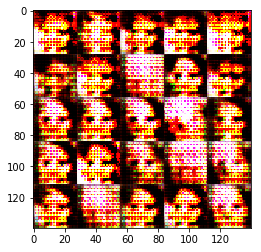

Epoch 1/1... Discriminator Loss: 0.9841... Generator Loss: 1.0354
Epoch 1/1... Discriminator Loss: 0.4615... Generator Loss: 1.6851
Epoch 1/1... Discriminator Loss: 0.3560... Generator Loss: 1.4245
Epoch 1/1... Discriminator Loss: 0.1307... Generator Loss: 2.7535
Epoch 1/1... Discriminator Loss: 0.0992... Generator Loss: 3.0692
Epoch 1/1... Discriminator Loss: 0.0761... Generator Loss: 2.7712
Epoch 1/1... Discriminator Loss: 0.0350... Generator Loss: 3.7817
Epoch 1/1... Discriminator Loss: 0.0590... Generator Loss: 3.4686
Epoch 1/1... Discriminator Loss: 1.7668... Generator Loss: 9.9234
Epoch 1/1... Discriminator Loss: 1.2073... Generator Loss: 1.1289


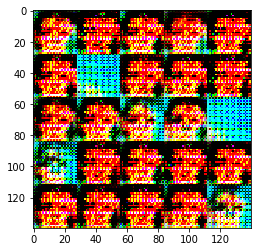

Epoch 1/1... Discriminator Loss: 0.9949... Generator Loss: 1.4308
Epoch 1/1... Discriminator Loss: 0.0341... Generator Loss: 3.9582
Epoch 1/1... Discriminator Loss: 0.0252... Generator Loss: 4.1825
Epoch 1/1... Discriminator Loss: 0.0035... Generator Loss: 8.2515
Epoch 1/1... Discriminator Loss: 3.0489... Generator Loss: 11.4669
Epoch 1/1... Discriminator Loss: 0.0630... Generator Loss: 6.5899
Epoch 1/1... Discriminator Loss: 0.0182... Generator Loss: 15.8377
Epoch 1/1... Discriminator Loss: 0.0145... Generator Loss: 4.6776
Epoch 1/1... Discriminator Loss: 0.1244... Generator Loss: 2.6190
Epoch 1/1... Discriminator Loss: 0.1680... Generator Loss: 3.8568


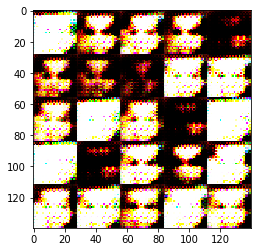

Epoch 1/1... Discriminator Loss: 1.6028... Generator Loss: 7.7106
Epoch 1/1... Discriminator Loss: 0.0846... Generator Loss: 3.0358
Epoch 1/1... Discriminator Loss: 0.0484... Generator Loss: 3.6340
Epoch 1/1... Discriminator Loss: 0.0291... Generator Loss: 3.9062
Epoch 1/1... Discriminator Loss: 0.0204... Generator Loss: 4.8340
Epoch 1/1... Discriminator Loss: 0.0517... Generator Loss: 3.6194
Epoch 1/1... Discriminator Loss: 0.0013... Generator Loss: 7.0008
Epoch 1/1... Discriminator Loss: 0.0274... Generator Loss: 3.8879
Epoch 1/1... Discriminator Loss: 0.0042... Generator Loss: 7.9226
Epoch 1/1... Discriminator Loss: 0.0025... Generator Loss: 6.5613


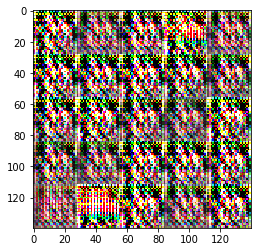

Epoch 1/1... Discriminator Loss: 0.0089... Generator Loss: 5.6826
Epoch 1/1... Discriminator Loss: 1.1942... Generator Loss: 0.6144
Epoch 1/1... Discriminator Loss: 0.7927... Generator Loss: 0.8844
Epoch 1/1... Discriminator Loss: 0.8741... Generator Loss: 3.9176
Epoch 1/1... Discriminator Loss: 0.5695... Generator Loss: 1.2529
Epoch 1/1... Discriminator Loss: 2.9938... Generator Loss: 0.1605
Epoch 1/1... Discriminator Loss: 0.4296... Generator Loss: 1.9207
Epoch 1/1... Discriminator Loss: 0.1089... Generator Loss: 3.0853
Epoch 1/1... Discriminator Loss: 0.1574... Generator Loss: 4.3843
Epoch 1/1... Discriminator Loss: 0.1999... Generator Loss: 2.7657


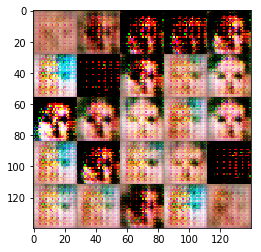

Epoch 1/1... Discriminator Loss: 1.0482... Generator Loss: 0.6780
Epoch 1/1... Discriminator Loss: 0.2554... Generator Loss: 1.8699
Epoch 1/1... Discriminator Loss: 0.3518... Generator Loss: 2.6995
Epoch 1/1... Discriminator Loss: 0.8164... Generator Loss: 1.7356
Epoch 1/1... Discriminator Loss: 0.6680... Generator Loss: 1.8024
Epoch 1/1... Discriminator Loss: 0.5329... Generator Loss: 3.6869
Epoch 1/1... Discriminator Loss: 3.4467... Generator Loss: 3.6986
Epoch 1/1... Discriminator Loss: 1.7945... Generator Loss: 3.9456
Epoch 1/1... Discriminator Loss: 4.1850... Generator Loss: 6.1504
Epoch 1/1... Discriminator Loss: 0.4440... Generator Loss: 2.1817


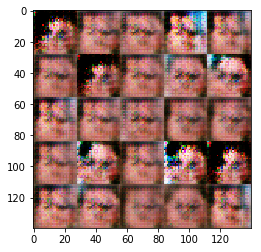

Epoch 1/1... Discriminator Loss: 1.7193... Generator Loss: 0.2744
Epoch 1/1... Discriminator Loss: 1.3733... Generator Loss: 0.4790
Epoch 1/1... Discriminator Loss: 1.4622... Generator Loss: 0.4387
Epoch 1/1... Discriminator Loss: 0.5543... Generator Loss: 1.2140
Epoch 1/1... Discriminator Loss: 0.3829... Generator Loss: 2.1752
Epoch 1/1... Discriminator Loss: 1.0956... Generator Loss: 1.3590
Epoch 1/1... Discriminator Loss: 0.9218... Generator Loss: 0.8828
Epoch 1/1... Discriminator Loss: 0.6364... Generator Loss: 1.3823
Epoch 1/1... Discriminator Loss: 1.1050... Generator Loss: 1.6797
Epoch 1/1... Discriminator Loss: 0.7850... Generator Loss: 1.0541


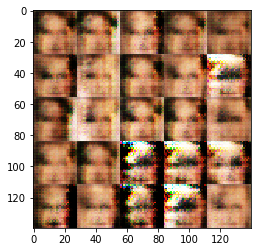

Epoch 1/1... Discriminator Loss: 0.9267... Generator Loss: 0.7710
Epoch 1/1... Discriminator Loss: 1.2464... Generator Loss: 0.6546
Epoch 1/1... Discriminator Loss: 0.8978... Generator Loss: 0.8053
Epoch 1/1... Discriminator Loss: 0.4918... Generator Loss: 1.9922
Epoch 1/1... Discriminator Loss: 0.8443... Generator Loss: 1.0397
Epoch 1/1... Discriminator Loss: 0.4494... Generator Loss: 1.4203
Epoch 1/1... Discriminator Loss: 0.5777... Generator Loss: 1.9835
Epoch 1/1... Discriminator Loss: 1.8056... Generator Loss: 0.5738
Epoch 1/1... Discriminator Loss: 1.0004... Generator Loss: 0.9716
Epoch 1/1... Discriminator Loss: 0.7331... Generator Loss: 1.3876


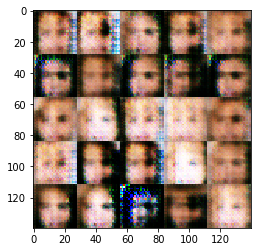

Epoch 1/1... Discriminator Loss: 1.2474... Generator Loss: 1.7013
Epoch 1/1... Discriminator Loss: 0.7221... Generator Loss: 1.2184
Epoch 1/1... Discriminator Loss: 0.8509... Generator Loss: 0.9097
Epoch 1/1... Discriminator Loss: 0.5727... Generator Loss: 1.1841
Epoch 1/1... Discriminator Loss: 0.5021... Generator Loss: 1.7801
Epoch 1/1... Discriminator Loss: 0.6122... Generator Loss: 1.0940
Epoch 1/1... Discriminator Loss: 1.0332... Generator Loss: 0.8496
Epoch 1/1... Discriminator Loss: 1.1054... Generator Loss: 1.1804
Epoch 1/1... Discriminator Loss: 1.5890... Generator Loss: 0.5430
Epoch 1/1... Discriminator Loss: 0.7485... Generator Loss: 1.5154


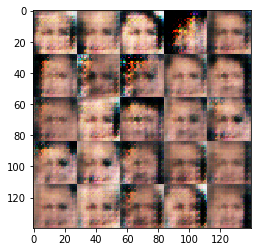

Epoch 1/1... Discriminator Loss: 1.1468... Generator Loss: 2.7500
Epoch 1/1... Discriminator Loss: 0.6461... Generator Loss: 1.2331
Epoch 1/1... Discriminator Loss: 1.0261... Generator Loss: 0.9858
Epoch 1/1... Discriminator Loss: 0.2519... Generator Loss: 1.8833
Epoch 1/1... Discriminator Loss: 1.5380... Generator Loss: 0.6062
Epoch 1/1... Discriminator Loss: 1.0469... Generator Loss: 0.8857
Epoch 1/1... Discriminator Loss: 1.3408... Generator Loss: 0.5193
Epoch 1/1... Discriminator Loss: 0.7136... Generator Loss: 1.6447
Epoch 1/1... Discriminator Loss: 0.5871... Generator Loss: 2.0539
Epoch 1/1... Discriminator Loss: 1.7367... Generator Loss: 3.0524


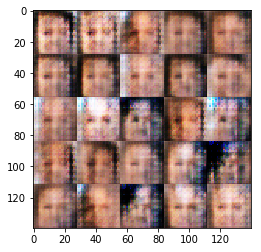

Epoch 1/1... Discriminator Loss: 0.6884... Generator Loss: 1.2615
Epoch 1/1... Discriminator Loss: 1.1910... Generator Loss: 0.5261
Epoch 1/1... Discriminator Loss: 0.7715... Generator Loss: 0.9996
Epoch 1/1... Discriminator Loss: 0.5344... Generator Loss: 1.5247
Epoch 1/1... Discriminator Loss: 0.6395... Generator Loss: 1.4642
Epoch 1/1... Discriminator Loss: 1.0709... Generator Loss: 0.8642
Epoch 1/1... Discriminator Loss: 0.4597... Generator Loss: 1.6654
Epoch 1/1... Discriminator Loss: 0.9831... Generator Loss: 1.2557
Epoch 1/1... Discriminator Loss: 0.8987... Generator Loss: 1.9274
Epoch 1/1... Discriminator Loss: 1.1863... Generator Loss: 0.6298


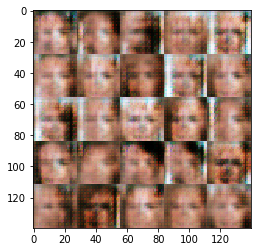

Epoch 1/1... Discriminator Loss: 1.2707... Generator Loss: 2.7113
Epoch 1/1... Discriminator Loss: 1.0639... Generator Loss: 0.9857
Epoch 1/1... Discriminator Loss: 0.9682... Generator Loss: 1.5027
Epoch 1/1... Discriminator Loss: 1.3512... Generator Loss: 0.5327
Epoch 1/1... Discriminator Loss: 0.2543... Generator Loss: 2.2118
Epoch 1/1... Discriminator Loss: 2.9425... Generator Loss: 0.1422
Epoch 1/1... Discriminator Loss: 2.7376... Generator Loss: 3.4439
Epoch 1/1... Discriminator Loss: 0.7135... Generator Loss: 1.5454
Epoch 1/1... Discriminator Loss: 0.8382... Generator Loss: 1.2473
Epoch 1/1... Discriminator Loss: 0.9444... Generator Loss: 0.7887


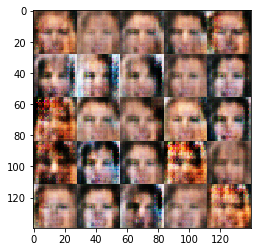

Epoch 1/1... Discriminator Loss: 0.4158... Generator Loss: 3.4811
Epoch 1/1... Discriminator Loss: 1.0926... Generator Loss: 1.3371
Epoch 1/1... Discriminator Loss: 0.8856... Generator Loss: 1.0614
Epoch 1/1... Discriminator Loss: 1.4912... Generator Loss: 0.6422
Epoch 1/1... Discriminator Loss: 1.1524... Generator Loss: 0.8307
Epoch 1/1... Discriminator Loss: 0.9848... Generator Loss: 1.0591
Epoch 1/1... Discriminator Loss: 0.6047... Generator Loss: 1.3216
Epoch 1/1... Discriminator Loss: 1.0712... Generator Loss: 0.7377
Epoch 1/1... Discriminator Loss: 1.0727... Generator Loss: 0.6380
Epoch 1/1... Discriminator Loss: 1.4107... Generator Loss: 0.4339


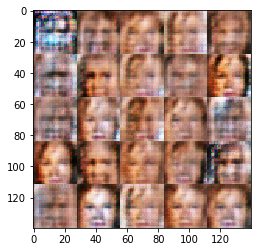

Epoch 1/1... Discriminator Loss: 1.0705... Generator Loss: 1.6027
Epoch 1/1... Discriminator Loss: 1.1563... Generator Loss: 0.9543
Epoch 1/1... Discriminator Loss: 1.0592... Generator Loss: 0.9011
Epoch 1/1... Discriminator Loss: 0.9845... Generator Loss: 1.0007
Epoch 1/1... Discriminator Loss: 1.2344... Generator Loss: 1.7672
Epoch 1/1... Discriminator Loss: 1.5531... Generator Loss: 0.4853
Epoch 1/1... Discriminator Loss: 0.9325... Generator Loss: 1.3282
Epoch 1/1... Discriminator Loss: 0.9979... Generator Loss: 2.8010
Epoch 1/1... Discriminator Loss: 0.8754... Generator Loss: 1.5526
Epoch 1/1... Discriminator Loss: 1.2179... Generator Loss: 2.5335


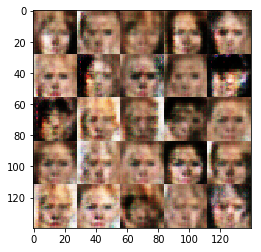

Epoch 1/1... Discriminator Loss: 1.2688... Generator Loss: 0.6424
Epoch 1/1... Discriminator Loss: 0.8406... Generator Loss: 1.3991
Epoch 1/1... Discriminator Loss: 1.0345... Generator Loss: 0.7385
Epoch 1/1... Discriminator Loss: 1.2161... Generator Loss: 0.4917
Epoch 1/1... Discriminator Loss: 1.6306... Generator Loss: 0.4790
Epoch 1/1... Discriminator Loss: 1.0704... Generator Loss: 0.9888
Epoch 1/1... Discriminator Loss: 1.1422... Generator Loss: 1.0781
Epoch 1/1... Discriminator Loss: 0.7981... Generator Loss: 1.4198
Epoch 1/1... Discriminator Loss: 1.0996... Generator Loss: 0.8777
Epoch 1/1... Discriminator Loss: 1.1979... Generator Loss: 0.6163


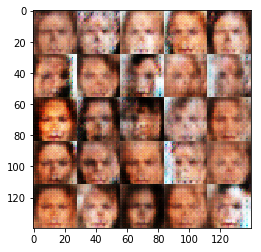

Epoch 1/1... Discriminator Loss: 0.7783... Generator Loss: 1.2758
Epoch 1/1... Discriminator Loss: 0.9429... Generator Loss: 0.9225
Epoch 1/1... Discriminator Loss: 1.2015... Generator Loss: 0.9240
Epoch 1/1... Discriminator Loss: 1.1738... Generator Loss: 0.7256
Epoch 1/1... Discriminator Loss: 1.0030... Generator Loss: 1.1837
Epoch 1/1... Discriminator Loss: 0.9576... Generator Loss: 1.0385
Epoch 1/1... Discriminator Loss: 1.0127... Generator Loss: 0.9250
Epoch 1/1... Discriminator Loss: 1.1448... Generator Loss: 1.1017
Epoch 1/1... Discriminator Loss: 1.5989... Generator Loss: 0.4040
Epoch 1/1... Discriminator Loss: 1.4727... Generator Loss: 0.4088


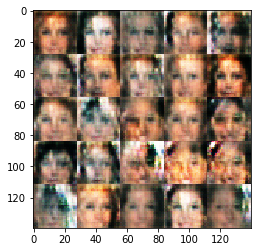

Epoch 1/1... Discriminator Loss: 1.1313... Generator Loss: 0.9885
Epoch 1/1... Discriminator Loss: 1.0549... Generator Loss: 0.9335
Epoch 1/1... Discriminator Loss: 0.9075... Generator Loss: 0.9018
Epoch 1/1... Discriminator Loss: 0.7094... Generator Loss: 1.0888
Epoch 1/1... Discriminator Loss: 1.1158... Generator Loss: 0.8679
Epoch 1/1... Discriminator Loss: 1.0763... Generator Loss: 1.0291
Epoch 1/1... Discriminator Loss: 1.4897... Generator Loss: 0.4326
Epoch 1/1... Discriminator Loss: 0.5913... Generator Loss: 1.7125
Epoch 1/1... Discriminator Loss: 1.8426... Generator Loss: 0.3016
Epoch 1/1... Discriminator Loss: 0.9981... Generator Loss: 2.0945


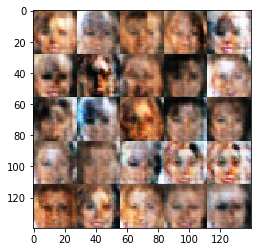

Epoch 1/1... Discriminator Loss: 1.1269... Generator Loss: 0.9968
Epoch 1/1... Discriminator Loss: 0.9735... Generator Loss: 1.6694
Epoch 1/1... Discriminator Loss: 0.9463... Generator Loss: 0.7789
Epoch 1/1... Discriminator Loss: 1.0403... Generator Loss: 1.0032
Epoch 1/1... Discriminator Loss: 1.2073... Generator Loss: 0.9094
Epoch 1/1... Discriminator Loss: 0.9733... Generator Loss: 1.4736
Epoch 1/1... Discriminator Loss: 0.4943... Generator Loss: 1.3968
Epoch 1/1... Discriminator Loss: 0.9539... Generator Loss: 1.4213
Epoch 1/1... Discriminator Loss: 1.0543... Generator Loss: 1.0638
Epoch 1/1... Discriminator Loss: 0.6320... Generator Loss: 1.1135


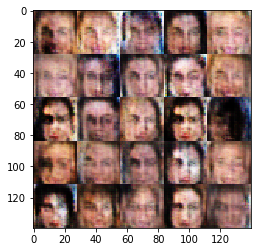

Epoch 1/1... Discriminator Loss: 1.1457... Generator Loss: 0.4859
Epoch 1/1... Discriminator Loss: 0.6571... Generator Loss: 1.5674
Epoch 1/1... Discriminator Loss: 4.9021... Generator Loss: 5.1632
Epoch 1/1... Discriminator Loss: 0.7987... Generator Loss: 0.9573
Epoch 1/1... Discriminator Loss: 2.7589... Generator Loss: 2.6598
Epoch 1/1... Discriminator Loss: 1.0117... Generator Loss: 0.7034
Epoch 1/1... Discriminator Loss: 0.6843... Generator Loss: 1.2088
Epoch 1/1... Discriminator Loss: 1.8717... Generator Loss: 1.1255
Epoch 1/1... Discriminator Loss: 0.7799... Generator Loss: 1.8070
Epoch 1/1... Discriminator Loss: 1.5635... Generator Loss: 0.3662


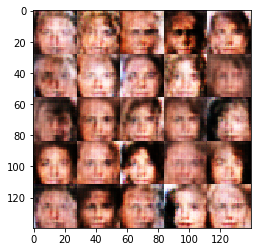

Epoch 1/1... Discriminator Loss: 1.0336... Generator Loss: 0.6984
Epoch 1/1... Discriminator Loss: 1.2485... Generator Loss: 1.5845
Epoch 1/1... Discriminator Loss: 1.8506... Generator Loss: 1.5090
Epoch 1/1... Discriminator Loss: 0.6160... Generator Loss: 1.5311
Epoch 1/1... Discriminator Loss: 0.9003... Generator Loss: 0.6699
Epoch 1/1... Discriminator Loss: 1.0775... Generator Loss: 1.2222
Epoch 1/1... Discriminator Loss: 0.7375... Generator Loss: 1.1351
Epoch 1/1... Discriminator Loss: 0.4553... Generator Loss: 1.2495
Epoch 1/1... Discriminator Loss: 0.1865... Generator Loss: 4.0388
Epoch 1/1... Discriminator Loss: 1.0032... Generator Loss: 1.0949


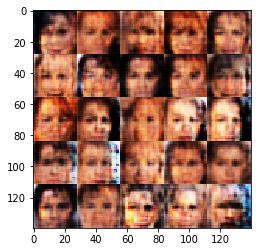

Epoch 1/1... Discriminator Loss: 0.9684... Generator Loss: 0.9276
Epoch 1/1... Discriminator Loss: 1.1797... Generator Loss: 0.8462
Epoch 1/1... Discriminator Loss: 1.0392... Generator Loss: 0.8131
Epoch 1/1... Discriminator Loss: 1.0553... Generator Loss: 0.7044
Epoch 1/1... Discriminator Loss: 1.2124... Generator Loss: 1.1189
Epoch 1/1... Discriminator Loss: 0.9527... Generator Loss: 1.9404
Epoch 1/1... Discriminator Loss: 1.2741... Generator Loss: 0.7534
Epoch 1/1... Discriminator Loss: 0.9748... Generator Loss: 1.4857
Epoch 1/1... Discriminator Loss: 0.9646... Generator Loss: 2.6012
Epoch 1/1... Discriminator Loss: 1.6279... Generator Loss: 0.3390


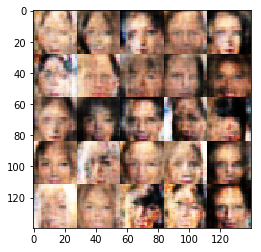

Epoch 1/1... Discriminator Loss: 1.1510... Generator Loss: 0.9283
Epoch 1/1... Discriminator Loss: 1.3699... Generator Loss: 0.6030
Epoch 1/1... Discriminator Loss: 1.1559... Generator Loss: 1.8180
Epoch 1/1... Discriminator Loss: 0.9914... Generator Loss: 1.0358
Epoch 1/1... Discriminator Loss: 1.0004... Generator Loss: 0.7309
Epoch 1/1... Discriminator Loss: 0.9823... Generator Loss: 0.9328
Epoch 1/1... Discriminator Loss: 1.0499... Generator Loss: 1.3284
Epoch 1/1... Discriminator Loss: 1.6886... Generator Loss: 3.1607
Epoch 1/1... Discriminator Loss: 1.8858... Generator Loss: 2.3611
Epoch 1/1... Discriminator Loss: 0.8511... Generator Loss: 1.5702


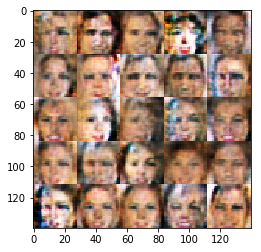

Epoch 1/1... Discriminator Loss: 0.9576... Generator Loss: 1.4251
Epoch 1/1... Discriminator Loss: 1.7605... Generator Loss: 1.8410
Epoch 1/1... Discriminator Loss: 0.7786... Generator Loss: 1.3662
Epoch 1/1... Discriminator Loss: 0.8577... Generator Loss: 3.9505
Epoch 1/1... Discriminator Loss: 1.6894... Generator Loss: 3.4322
Epoch 1/1... Discriminator Loss: 0.4549... Generator Loss: 1.3155
Epoch 1/1... Discriminator Loss: 0.5742... Generator Loss: 1.4285
Epoch 1/1... Discriminator Loss: 0.4827... Generator Loss: 2.9334
Epoch 1/1... Discriminator Loss: 1.3135... Generator Loss: 1.2439
Epoch 1/1... Discriminator Loss: 0.1425... Generator Loss: 2.7149


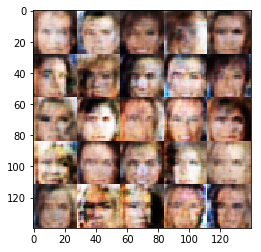

Epoch 1/1... Discriminator Loss: 2.3061... Generator Loss: 0.2973
Epoch 1/1... Discriminator Loss: 1.3022... Generator Loss: 0.8549
Epoch 1/1... Discriminator Loss: 0.4695... Generator Loss: 1.4788
Epoch 1/1... Discriminator Loss: 0.2745... Generator Loss: 1.6904
Epoch 1/1... Discriminator Loss: 1.2488... Generator Loss: 0.6194
Epoch 1/1... Discriminator Loss: 0.1900... Generator Loss: 2.1016
Epoch 1/1... Discriminator Loss: 0.1301... Generator Loss: 2.5244
Epoch 1/1... Discriminator Loss: 1.1137... Generator Loss: 0.7723
Epoch 1/1... Discriminator Loss: 1.2590... Generator Loss: 0.8954
Epoch 1/1... Discriminator Loss: 1.1167... Generator Loss: 1.0884


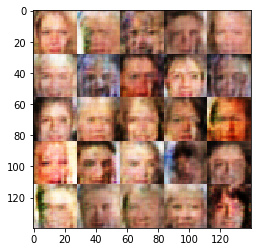

Epoch 1/1... Discriminator Loss: 0.9406... Generator Loss: 1.9196
Epoch 1/1... Discriminator Loss: 1.0415... Generator Loss: 0.7509
Epoch 1/1... Discriminator Loss: 1.0102... Generator Loss: 1.0310
Epoch 1/1... Discriminator Loss: 1.0421... Generator Loss: 0.7599
Epoch 1/1... Discriminator Loss: 1.0876... Generator Loss: 1.1606
Epoch 1/1... Discriminator Loss: 1.0471... Generator Loss: 0.8552
Epoch 1/1... Discriminator Loss: 0.8001... Generator Loss: 1.7648
Epoch 1/1... Discriminator Loss: 1.1277... Generator Loss: 0.6920
Epoch 1/1... Discriminator Loss: 3.7550... Generator Loss: 4.3757
Epoch 1/1... Discriminator Loss: 0.4267... Generator Loss: 2.1501


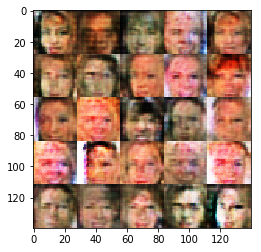

Epoch 1/1... Discriminator Loss: 1.1899... Generator Loss: 0.5716
Epoch 1/1... Discriminator Loss: 1.1422... Generator Loss: 1.6511
Epoch 1/1... Discriminator Loss: 1.4210... Generator Loss: 2.0428
Epoch 1/1... Discriminator Loss: 1.0325... Generator Loss: 1.0559
Epoch 1/1... Discriminator Loss: 1.1471... Generator Loss: 0.6206
Epoch 1/1... Discriminator Loss: 1.1507... Generator Loss: 1.5096
Epoch 1/1... Discriminator Loss: 0.5696... Generator Loss: 3.6883
Epoch 1/1... Discriminator Loss: 0.8843... Generator Loss: 0.6938
Epoch 1/1... Discriminator Loss: 0.8878... Generator Loss: 1.1275
Epoch 1/1... Discriminator Loss: 1.2313... Generator Loss: 0.5177


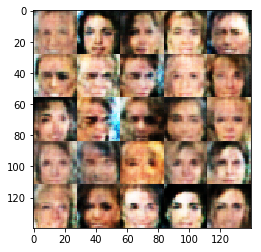

Epoch 1/1... Discriminator Loss: 0.5333... Generator Loss: 1.5573
Epoch 1/1... Discriminator Loss: 1.3416... Generator Loss: 1.7353
Epoch 1/1... Discriminator Loss: 0.9009... Generator Loss: 0.7836
Epoch 1/1... Discriminator Loss: 0.9277... Generator Loss: 0.8929
Epoch 1/1... Discriminator Loss: 1.0757... Generator Loss: 1.1789
Epoch 1/1... Discriminator Loss: 1.8764... Generator Loss: 1.5628
Epoch 1/1... Discriminator Loss: 1.4414... Generator Loss: 0.4057
Epoch 1/1... Discriminator Loss: 0.6229... Generator Loss: 1.2235
Epoch 1/1... Discriminator Loss: 0.6286... Generator Loss: 3.5786
Epoch 1/1... Discriminator Loss: 0.8060... Generator Loss: 0.7053


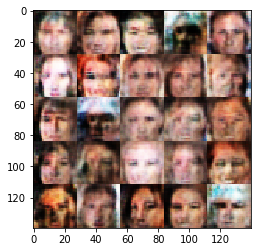

Epoch 1/1... Discriminator Loss: 0.6351... Generator Loss: 1.0131
Epoch 1/1... Discriminator Loss: 0.5423... Generator Loss: 1.1885
Epoch 1/1... Discriminator Loss: 0.8178... Generator Loss: 0.8420
Epoch 1/1... Discriminator Loss: 0.9996... Generator Loss: 1.4195
Epoch 1/1... Discriminator Loss: 1.0758... Generator Loss: 2.0273
Epoch 1/1... Discriminator Loss: 0.3013... Generator Loss: 3.3254
Epoch 1/1... Discriminator Loss: 0.7053... Generator Loss: 0.8587
Epoch 1/1... Discriminator Loss: 1.0724... Generator Loss: 0.5781
Epoch 1/1... Discriminator Loss: 0.9428... Generator Loss: 1.0081
Epoch 1/1... Discriminator Loss: 0.2865... Generator Loss: 3.5737


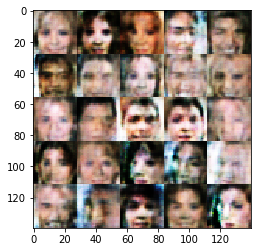

Epoch 1/1... Discriminator Loss: 1.2114... Generator Loss: 0.5197
Epoch 1/1... Discriminator Loss: 0.1376... Generator Loss: 2.3408
Epoch 1/1... Discriminator Loss: 0.3455... Generator Loss: 2.4525
Epoch 1/1... Discriminator Loss: 0.1738... Generator Loss: 3.2400
Epoch 1/1... Discriminator Loss: 0.7469... Generator Loss: 3.8834
Epoch 1/1... Discriminator Loss: 1.3667... Generator Loss: 0.5188
Epoch 1/1... Discriminator Loss: 0.5100... Generator Loss: 1.2098
Epoch 1/1... Discriminator Loss: 0.3170... Generator Loss: 1.7321
Epoch 1/1... Discriminator Loss: 0.9559... Generator Loss: 0.6269
Epoch 1/1... Discriminator Loss: 1.4399... Generator Loss: 0.9448


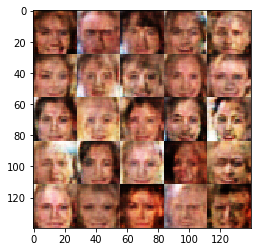

Epoch 1/1... Discriminator Loss: 1.0304... Generator Loss: 0.9398
Epoch 1/1... Discriminator Loss: 1.3028... Generator Loss: 0.6430
Epoch 1/1... Discriminator Loss: 0.9343... Generator Loss: 1.0603
Epoch 1/1... Discriminator Loss: 0.7387... Generator Loss: 1.0231
Epoch 1/1... Discriminator Loss: 0.4819... Generator Loss: 2.2795
Epoch 1/1... Discriminator Loss: 0.5958... Generator Loss: 1.5683
Epoch 1/1... Discriminator Loss: 1.0808... Generator Loss: 0.7709
Epoch 1/1... Discriminator Loss: 1.0325... Generator Loss: 0.9301
Epoch 1/1... Discriminator Loss: 1.1833... Generator Loss: 0.8129
Epoch 1/1... Discriminator Loss: 1.0008... Generator Loss: 0.9187


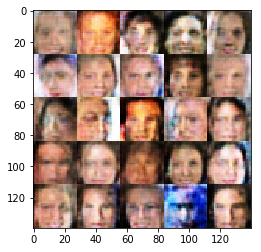

Epoch 1/1... Discriminator Loss: 0.8850... Generator Loss: 0.7738
Epoch 1/1... Discriminator Loss: 1.2889... Generator Loss: 0.5864
Epoch 1/1... Discriminator Loss: 0.2805... Generator Loss: 1.8910
Epoch 1/1... Discriminator Loss: 0.6278... Generator Loss: 1.0903
Epoch 1/1... Discriminator Loss: 0.3973... Generator Loss: 3.0959
Epoch 1/1... Discriminator Loss: 1.1955... Generator Loss: 0.4815
Epoch 1/1... Discriminator Loss: 0.6234... Generator Loss: 2.3298
Epoch 1/1... Discriminator Loss: 0.1668... Generator Loss: 3.1151
Epoch 1/1... Discriminator Loss: 1.4634... Generator Loss: 0.4065
Epoch 1/1... Discriminator Loss: 0.2008... Generator Loss: 2.5142


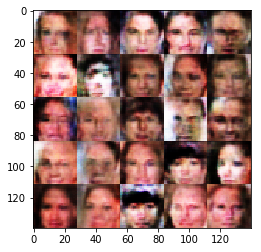

Epoch 1/1... Discriminator Loss: 1.8385... Generator Loss: 2.2301
Epoch 1/1... Discriminator Loss: 1.3259... Generator Loss: 0.7886
Epoch 1/1... Discriminator Loss: 1.1951... Generator Loss: 0.9327
Epoch 1/1... Discriminator Loss: 1.1190... Generator Loss: 0.8604
Epoch 1/1... Discriminator Loss: 1.0425... Generator Loss: 0.9009
Epoch 1/1... Discriminator Loss: 1.1106... Generator Loss: 0.7507


In [13]:
batch_size = 64
z_dim = 100
learning_rate = 0.005
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.